In [3]:
import pandas as pd
# Load the CSV file
Final_merged = pd.read_csv("C:/Users/clair/Downloads/final_merged.csv")
# Check the data
Final_merged.info()


C:\Users\clair\AppData\Local\Temp\ipykernel_252176\394186093.py:3: DtypeWarning: Columns (18,42,45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  Final_merged = pd.read_csv("C:/Users/clair/Downloads/final_merged.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664278 entries, 0 to 11664277
Data columns (total 51 columns):
 #   Column                Dtype  
---  ------                -----  
 0   OBJECTID              int64  
 1   ROAD                  int64  
 2   ROAD_NAME_x           object 
 3   COMMON_USAGE_NAME     object 
 4   START_SLK_x           float64
 5   END_SLK_x             float64
 6   CWY                   object 
 7   START_TRUE_DIST       float64
 8   END_TRUE_DIST         float64
 9   NETWORK_TYPE          object 
 10  RA_NO                 int64  
 11  RA_NAME               object 
 12  LG_NO                 int64  
 13  LG_NAME               object 
 14  SPEED_LIMIT           object 
 15  ROUTE_NE_ID           int64  
 16  GEOLOCSTLength        float64
 17  speed                 float64
 18  near_miss             object 
 19  ID                    int64  
 20  datetime              object 
 21  siteno                int64  
 22  Primary_Road          object 
 23  Locat

In [4]:
# Total number of rows in the DataFrame
total_rows = len(Final_merged)

# Non-missing values count per column
non_missing_count = Final_merged.notnull().sum()

# Missing values count per column
missing_count = Final_merged.isnull().sum()

summary_df = pd.DataFrame({
    'Total Values': total_rows,  
    'Non-missing Values': non_missing_count,
    'Missing Values': missing_count
})
print(summary_df)


                      Total Values  Non-missing Values  Missing Values
OBJECTID                  11664278            11664278               0
ROAD                      11664278            11664278               0
ROAD_NAME_x               11664278            11664278               0
COMMON_USAGE_NAME         11664278            11664278               0
START_SLK_x               11664278            11664278               0
END_SLK_x                 11664278            11664278               0
CWY                       11664278            11664278               0
START_TRUE_DIST           11664278            11664278               0
END_TRUE_DIST             11664278            11664278               0
NETWORK_TYPE              11664278            11664278               0
RA_NO                     11664278            11664278               0
RA_NAME                   11664278            11664278               0
LG_NO                     11664278            11664278               0
LG_NAM

In [5]:
# Split the DataFrame into two: Metropolitan and Non-Metropolitan
metropolitan_df = Final_merged[Final_merged['RA_NAME'].str.contains("Metropolitan", na=False)]
non_metropolitan_df = Final_merged[~Final_merged['RA_NAME'].str.contains("Metropolitan", na=False)]

# Save both DataFrames to separate CSV files
metropolitan_df.to_csv('metropolitan.csv', index=False)
non_metropolitan_df.to_csv('non_metropolitan.csv', index=False)


def summarize_data(df):
    total_rows = len(df)
    non_missing_count = df.notnull().sum()
    missing_count = df.isnull().sum()
    
    summary_df = pd.DataFrame({
        'Total Values': total_rows,  
        'Non-missing Values': non_missing_count,
        'Missing Values': missing_count
    })
    return summary_df

metropolitan_summary = summarize_data(metropolitan_df)
non_metropolitan_summary = summarize_data(non_metropolitan_df)

# Display summaries
print("Metropolitan DataFrame Summary:")
print(metropolitan_summary)

print("\nNon-Metropolitan DataFrame Summary:")
print(non_metropolitan_summary)


Metropolitan DataFrame Summary:
                      Total Values  Non-missing Values  Missing Values
OBJECTID                  10987138            10987138               0
ROAD                      10987138            10987138               0
ROAD_NAME_x               10987138            10987138               0
COMMON_USAGE_NAME         10987138            10987138               0
START_SLK_x               10987138            10987138               0
END_SLK_x                 10987138            10987138               0
CWY                       10987138            10987138               0
START_TRUE_DIST           10987138            10987138               0
END_TRUE_DIST             10987138            10987138               0
NETWORK_TYPE              10987138            10987138               0
RA_NO                     10987138            10987138               0
RA_NAME                   10987138            10987138               0
LG_NO                     10987138           

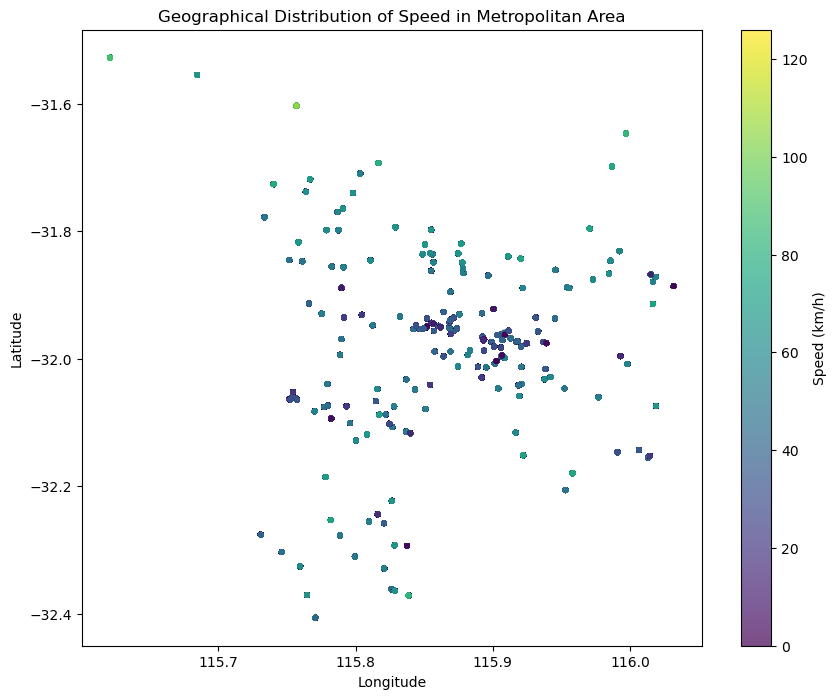

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=metropolitan_df['Longitude'], 
    y=metropolitan_df['Latitude'], 
    c=metropolitan_df['speed'], 
    cmap='viridis', 
    s=10, 
    alpha=0.7
)

# Add color bar
plt.colorbar(scatter, label='Speed (km/h)')

# Set plot titles and labels
plt.title('Geographical Distribution of Speed in Metropolitan Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()


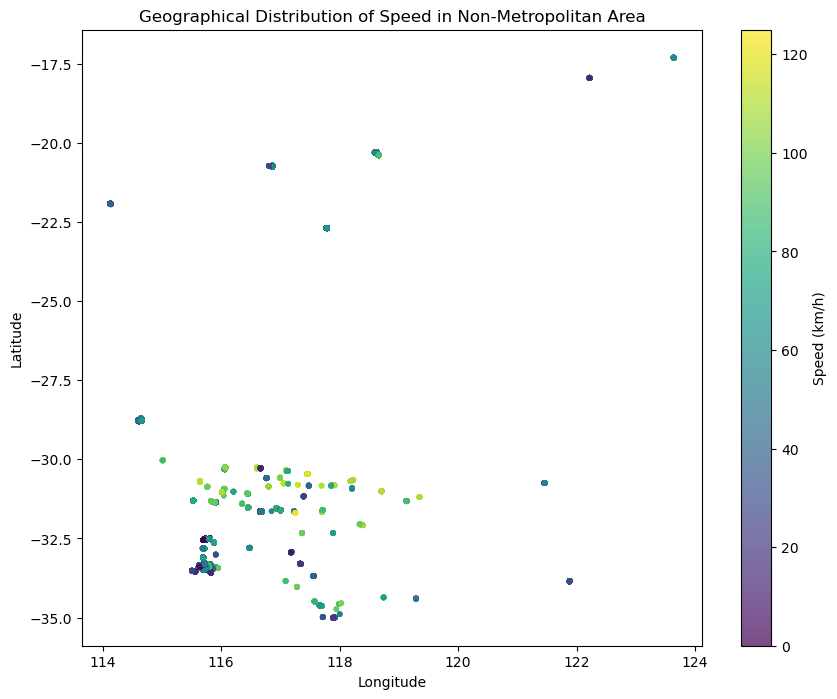

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot for the non-metropolitan area
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=non_metropolitan_df['Longitude'], 
    y=non_metropolitan_df['Latitude'], 
    c=non_metropolitan_df['speed'], 
    cmap='viridis', 
    s=10, 
    alpha=0.7
)

plt.colorbar(scatter, label='Speed (km/h)')

# Set plot titles and labels
plt.title('Geographical Distribution of Speed in Non-Metropolitan Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()
